## Time Series Model - Stationarity Analysis

In [2]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

from datetime import timedelta
from math import sqrt
import random

import os

import warnings
warnings.filterwarnings("ignore")

### Extracting the data

In [3]:
# Import the entire time series 

df_oct19 = pd.read_csv('ts_dataset.csv').set_index('last_reported_2').sort_index()
df_oct19.index = pd.to_datetime(df_oct19.index)

print(f'DF shape: {df_oct19.shape}')
df_oct19.head()

DF shape: (35564, 27)


,Unnamed: 0,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,last_reported,is_charging_station,status,name,lat,lon,altitude,post_code,capacity,year,month,day,day_of_week,hour,minute,second,IsWeekday,TimeSlice
last_reported_2,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:01:19,10422,183,28,27,1,0,1,1,1,1.569888e+09,True,IN_SERVICE,"C/ GAVÀ, 1",41.372338,2.141875,61.0,8908.0,28.0,2019,10,1,1,0,1,19,True,0
2019-10-01 00:01:36,10368,126,17,17,0,5,1,1,1,1.569888e+09,True,IN_SERVICE,PG. DE COLOM /VIA LAIETANA,41.380679,2.181775,5.0,8908.0,23.0,2019,10,1,1,0,1,36,True,0
2019-10-01 00:02:04,10568,331,0,0,0,30,1,1,1,1.569888e+09,True,IN_SERVICE,"C/ CASTELLNOU, 65",41.397060,2.128010,82.0,8908.0,31.0,2019,10,1,1,0,2,4,True,0
2019-10-01 00:02:36,10344,102,0,0,0,24,1,1,1,1.569888e+09,True,IN_SERVICE,"AV. DIAGONAL, 612",41.392252,2.142044,69.0,8908.0,24.0,2019,10,1,1,0,2,36,True,0
2019-10-01 00:05:59,10778,126,17,17,0,5,1,1,1,1.569888e+09,True,IN_SERVICE,PG. DE COLOM /VIA LAIETANA,41.380679,2.181775,5.0,8908.0,23.0,2019,10,1,1,0,5,59,True,0


In [4]:
df_oct19.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35564 entries, 2019-10-01 00:01:19 to 2019-10-31 22:55:21
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            35564 non-null  int64  
 1   station_id                            35564 non-null  int64  
 2   num_bikes_available                   35564 non-null  int64  
 3   num_bikes_available_types.mechanical  35564 non-null  int64  
 4   num_bikes_available_types.ebike       35564 non-null  int64  
 5   num_docks_available                   35564 non-null  int64  
 6   is_installed                          35564 non-null  int64  
 7   is_renting                            35564 non-null  int64  
 8   is_returning                          35564 non-null  int64  
 9   last_reported                         35564 non-null  float64
 10  is_charging_station                   35564 non

In [5]:
df_oct19_1 = df_oct19.copy()

In [6]:
df_oct19_1 = df_oct19_1.drop('Unnamed: 0', axis=1)
df_oct19_1.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,last_reported,is_charging_station,status,name,lat,lon,altitude,post_code,capacity,year,month,day,day_of_week,hour,minute,second,IsWeekday,TimeSlice
last_reported_2,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:01:19,183,28,27,1,0,1,1,1,1.569888e+09,True,IN_SERVICE,"C/ GAVÀ, 1",41.372338,2.141875,61.0,8908.0,28.0,2019,10,1,1,0,1,19,True,0
2019-10-01 00:01:36,126,17,17,0,5,1,1,1,1.569888e+09,True,IN_SERVICE,PG. DE COLOM /VIA LAIETANA,41.380679,2.181775,5.0,8908.0,23.0,2019,10,1,1,0,1,36,True,0
2019-10-01 00:02:04,331,0,0,0,30,1,1,1,1.569888e+09,True,IN_SERVICE,"C/ CASTELLNOU, 65",41.397060,2.128010,82.0,8908.0,31.0,2019,10,1,1,0,2,4,True,0
2019-10-01 00:02:36,102,0,0,0,24,1,1,1,1.569888e+09,True,IN_SERVICE,"AV. DIAGONAL, 612",41.392252,2.142044,69.0,8908.0,24.0,2019,10,1,1,0,2,36,True,0
2019-10-01 00:05:59,126,17,17,0,5,1,1,1,1.569888e+09,True,IN_SERVICE,PG. DE COLOM /VIA LAIETANA,41.380679,2.181775,5.0,8908.0,23.0,2019,10,1,1,0,5,59,True,0


In [7]:
df_oct19_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35564 entries, 2019-10-01 00:01:19 to 2019-10-31 22:55:21
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   station_id                            35564 non-null  int64  
 1   num_bikes_available                   35564 non-null  int64  
 2   num_bikes_available_types.mechanical  35564 non-null  int64  
 3   num_bikes_available_types.ebike       35564 non-null  int64  
 4   num_docks_available                   35564 non-null  int64  
 5   is_installed                          35564 non-null  int64  
 6   is_renting                            35564 non-null  int64  
 7   is_returning                          35564 non-null  int64  
 8   last_reported                         35564 non-null  float64
 9   is_charging_station                   35564 non-null  bool   
 10  status                                35564 non

In [8]:
# Select data of interest

data_of_interest = ['num_bikes_available', 'num_bikes_available_types.mechanical', 'num_bikes_available_types.ebike', 'num_docks_available']

df_select = df_oct19_1[data_of_interest + ['station_id']]

print(f'The variables of interest are {len(data_of_interest)}: {data_of_interest}')
print('')

stations_of_interest = [331, 183, 126, 102]

print(f'The stations of interest are {len(stations_of_interest)}: {stations_of_interest}')
print('')

# Select data for the time period of interest

first_date = '2019-10-01 00:00:00'
last_date = '2019-10-28 23:59:59'

df_select = df_select.loc[first_date:last_date].sort_index()

print(f'The time period is from {first_date} to {last_date}')
print('')

# Inspect resulting dataframe

print(f'Filtered DF shape: {df_select.shape}')
df_select.head()

The variables of interest are 4: ['num_bikes_available', 'num_bikes_available_types.mechanical', 'num_bikes_available_types.ebike', 'num_docks_available']

The stations of interest are 4: [331, 183, 126, 102]

The time period is from 2019-10-01 00:00:00 to 2019-10-28 23:59:59

Filtered DF shape: (32160, 5)


,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,station_id
last_reported_2,,,,,
2019-10-01 00:01:19,28,27,1,0,183
2019-10-01 00:01:36,17,17,0,5,126
2019-10-01 00:02:04,0,0,0,30,331
2019-10-01 00:02:36,0,0,0,24,102
2019-10-01 00:05:59,17,17,0,5,126


In [9]:
# Generate dataframe for one variable and one station of interest

var_interest = 'num_bikes_available'
station_of_interest = 331

var_station = df_select.loc[df_select['station_id'] == station_of_interest]
var_station = var_station.drop(columns = [x for x in data_of_interest if x is not var_interest], axis=1)
var_station.drop('station_id', axis=1, inplace=True)
# var_station.fillna(method='ffill', inplace=True)

var_station['weekday'] = var_station.index.weekday
var_station['year'] = var_station.index.year
var_station['month'] = var_station.index.month
var_station['day'] = var_station.index.day
var_station['hour'] = var_station.index.hour
var_station['minute'] = var_station.index.minute
var_station['second'] = var_station.index.minute
# var_station.fillna(0, inplace=True)

print(f'DF shape: {var_station.shape}')
print(f'Missing values: {var_station[var_interest].isnull().sum()}')
var_station.head()

DF shape: (8040, 8)
Missing values: 0


,num_bikes_available,weekday,year,month,day,hour,minute,second
last_reported_2,,,,,,,,
2019-10-01 00:02:04,0,1,2019,10,1,0,2,2
2019-10-01 00:06:26,0,1,2019,10,1,0,6,6
2019-10-01 00:10:48,0,1,2019,10,1,0,10,10
2019-10-01 00:19:32,0,1,2019,10,1,0,19,19
2019-10-01 00:23:54,1,1,2019,10,1,0,23,23


### Visualizing the target variable

Text(0, 0.5, 'num_bikes_available')

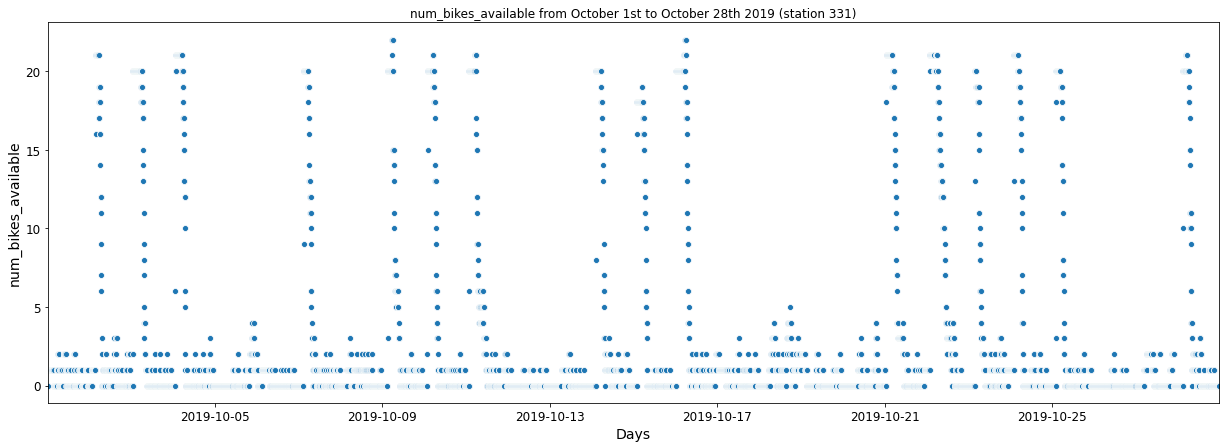

In [10]:
# Plot target variable

fig, ax = plt.subplots(figsize=(21,7))

sns.scatterplot(x = var_station.index, y = var_station[var_interest])
ax.axes.set_xlim(var_station.index.min(), var_station.index.max())
plt.title(f'{var_interest} from October 1st to October 28th 2019 (station 331)') 
plt.xlabel('Days')
plt.ylabel(var_interest)

Text(0.5, 1.0, 'Distribution of num_bikes_available station 331')

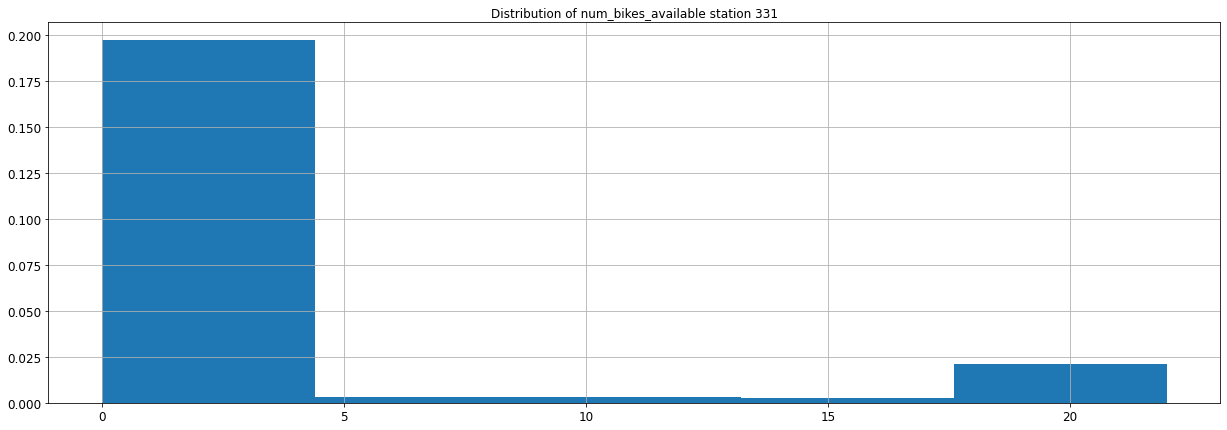

In [11]:
# Plot the distribution target variable

fig, ax = plt.subplots(figsize=(21,7))

var_station[var_interest].hist(density=True, bins = 5)
plt.title(f'Distribution of {var_interest} station 331') 

__Reviewing plots of the density of observations can provide further insight into the structure of the data:__
- The distribution is not normal.
- The distribution is left shifted.
- Transformations might be useful prior to modelling.

Text(0.5, 0, 'Days')

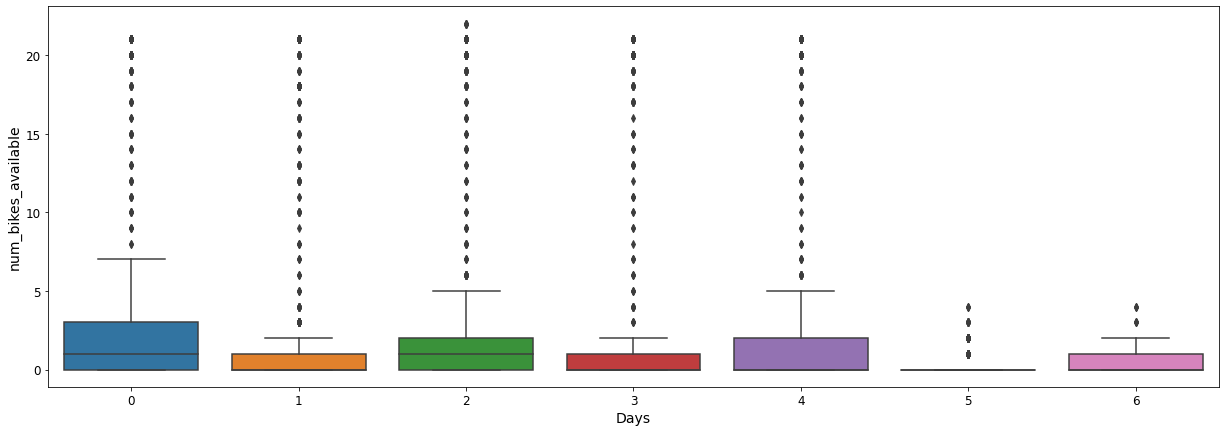

In [12]:
# Plot the range and year on year variability of the target variable 

fig, ax = plt.subplots(figsize=(21,7))

sns.boxplot(var_station.index.weekday, var_station[var_interest])
plt.xlabel('Days')

__Box and Whisker Plots:__
- Median values and spread across weekdays show the variability of the number of bikes available. The median is close to zero for each day of the week, and the working days (from Monday to Friday) show some outliers because during these days there is a service where they collect bikes from a station that is almost full and bring those bikes to the stations that are almost empty (such as the present case). However, during the weekend it seems that this collecting bike service doesn't work.

### Decomposition of the time series data

- **Additive Model**

An additive model suggests that the components are added together as follows:

y(t) = Level + Trend + Seasonality + Noise

An additive model is linear where changes over time are consistently made by the same amount. A linear trend is a straight line

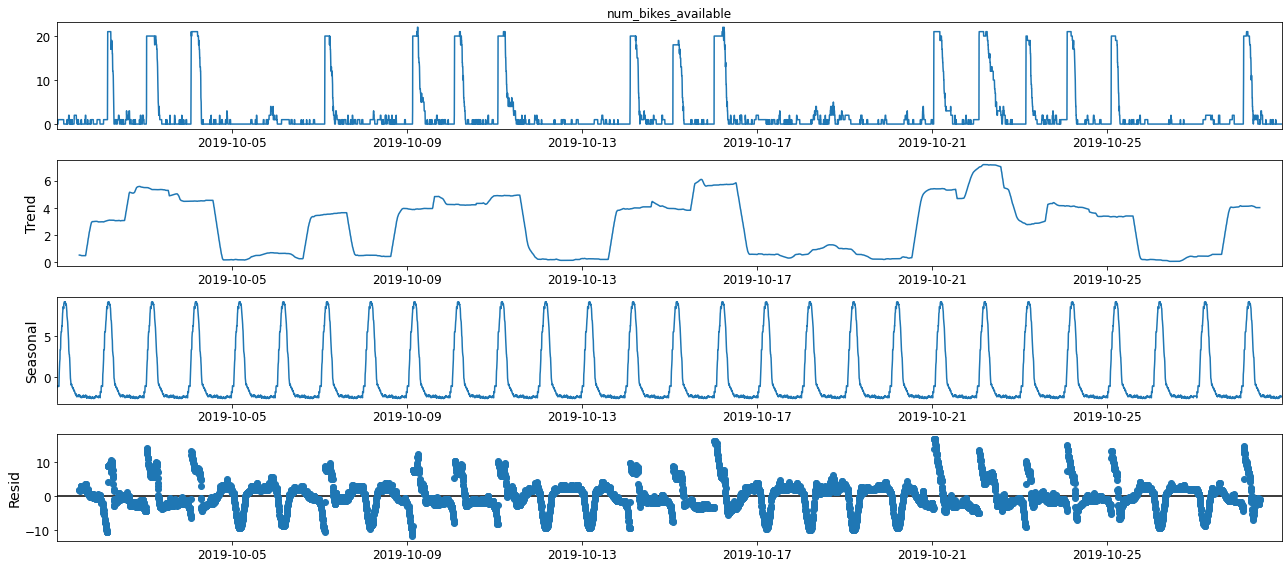

In [13]:
# Plot the decomposition of the target variable with an additive model

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(var_station[var_interest], model='additive', freq=288)
fig = decomposition.plot()
plt.show()

### Establishing stationarity

#### ACF and PACF plots

**Auto correlation function (ACF)** is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’


The **partial autocorrelation function (PACF)** gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

 > If the time series is stationary, the ACF/PACF plots will show a __quick drop-off in correlation__ after a small amount of lag between points.

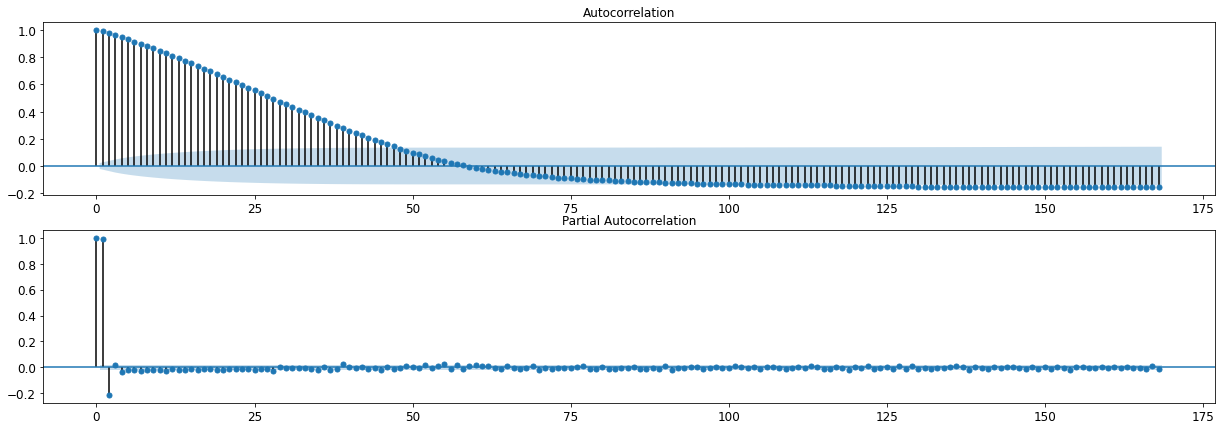

In [14]:
# Plot the autocorrelation and partial autocorrelation functions for the target variable

plt.figure(figsize=(21,7))
plt.subplot(211)
plot_acf(var_station[var_interest], ax=plt.gca(), lags = 24*7)
plt.subplot(212)
plot_pacf(var_station[var_interest], ax=plt.gca(), lags = 24*7)
plt.show()

### Interpreting ACF plots


ACF Shape	| Indicated Model |
-- | -- |
Exponential, decaying to zero |	Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model |
Alternating positive and negative, decaying to zero	Autoregressive model. |  Use the partial autocorrelation plot to help identify the order. |
One or more spikes, rest are essentially zero | Moving average model, order identified by where plot becomes zero. |
Decay, starting after a few lags |	Mixed autoregressive and moving average (ARMA) model. | 
All zero or close to zero | Data are essentially random. |
High values at fixed intervals | Include seasonal autoregressive term. |
No decay to zero |	Series is not stationary |

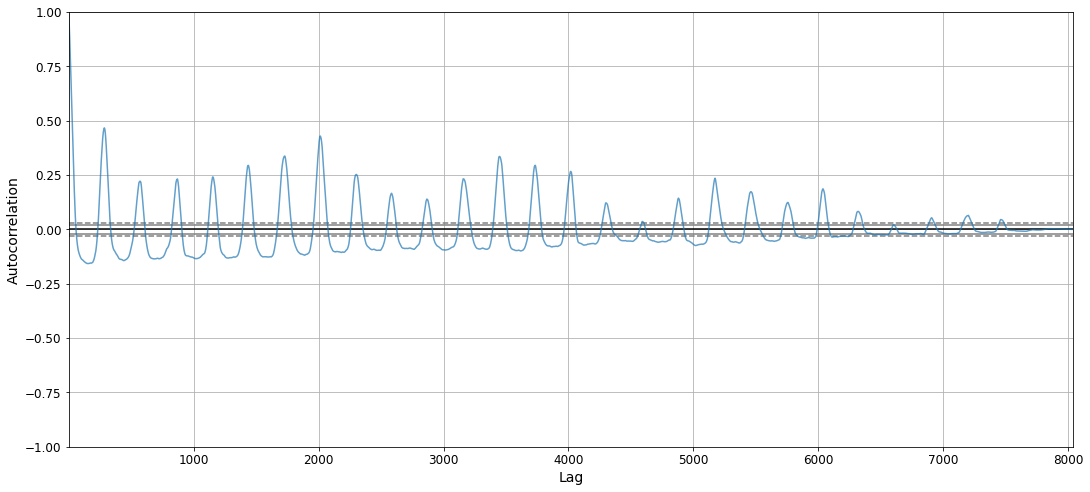

In [15]:
# Plot the autocorrelation for the target variable

autocorrelation_plot(var_station[var_interest], alpha=0.7)

#### Plotting Rolling Statistics

The most basic approach for understanding this is to plot the data and check if there’s any hint at the presence of underlying trends or seasonality. This visual practice rarely helps and often its difficult for the human eye to tell this. So we can add rolling statistics (like moving average, rolling std etc) to the data with a fixed window size to check for stationarity.

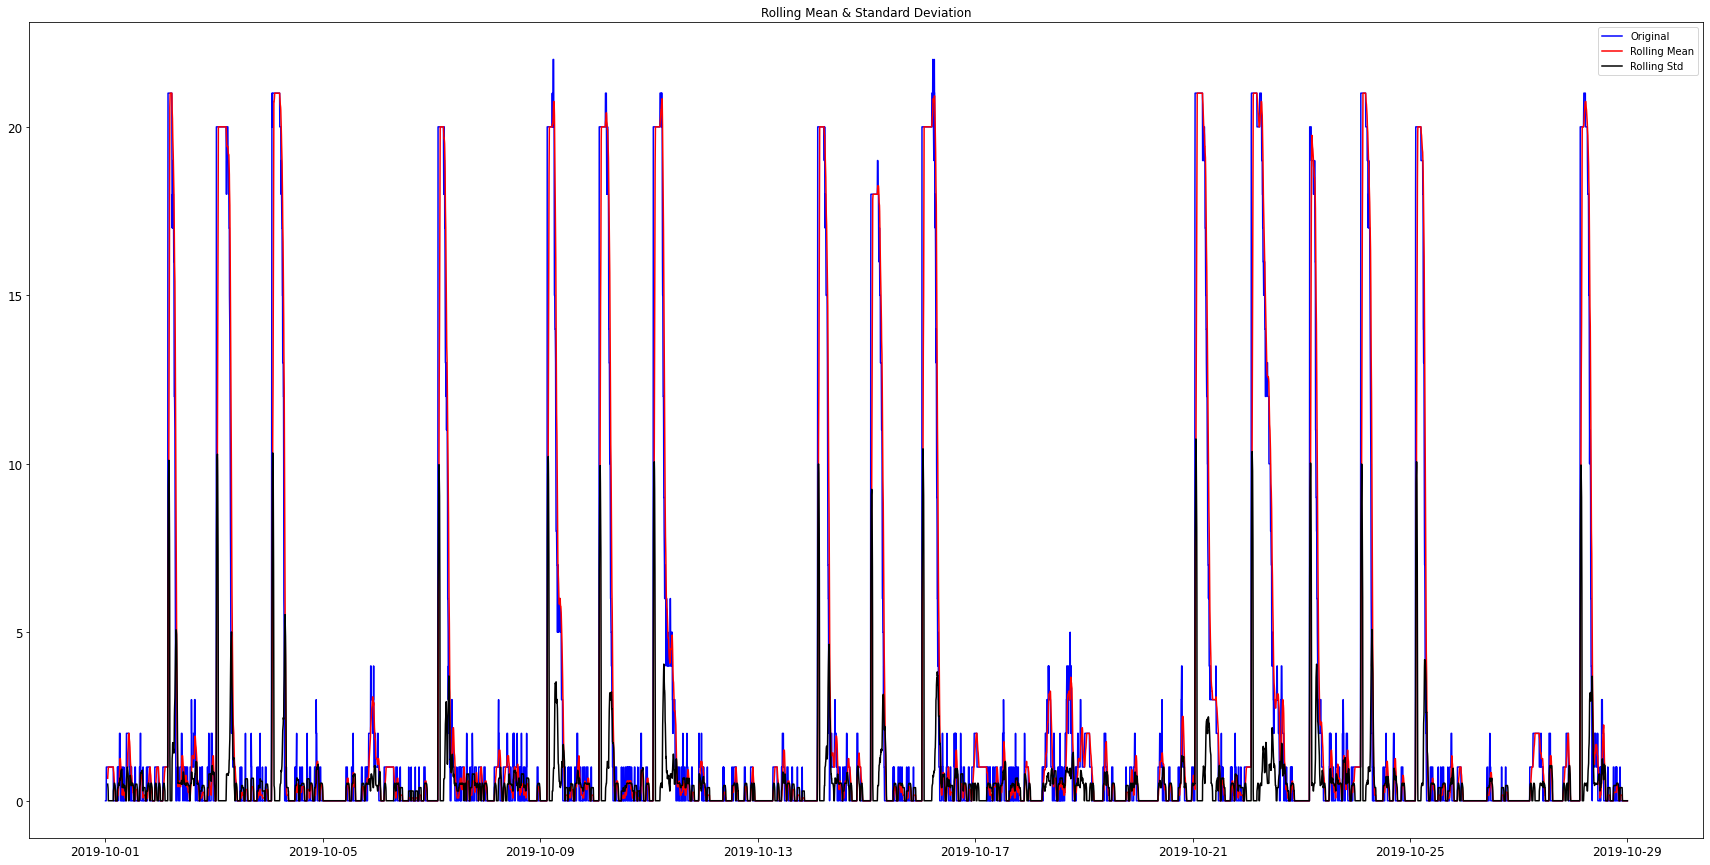

In [16]:
#Determing rolling statistics
rolmean = var_station[var_interest].rolling(12).mean()
rolstd = var_station[var_interest].rolling(12).std()

#Plot rolling statistics:
plt.figure(figsize=(30,15))
orig = plt.plot(var_station[var_interest], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#### Dickey-Fuller Test

The `Augmented Dickey Fuller Test (ADF)` is unit root test for stationarity. Unit roots can cause unpredictable results in your time series analysis.

The Augmented Dickey-Fuller test can be used with serial correlation. Steps to follow:

- The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1)  will provide no relevant information in predicting the change in y(t).
- Null hypothesis: The time series is not stationary
- Rejecting the null hypothesis (i.e. a very low p-value) will indicate stationarity

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(var_station[var_interest], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.000078e+01
p-value                        1.886781e-17
#Lags Used                     1.900000e+01
Number of Observations Used    8.020000e+03
Critical Value (1%)           -3.431166e+00
Critical Value (5%)           -2.861900e+00
Critical Value (10%)          -2.566962e+00
dtype: float64


### We can put all the different ways of assessing Stationarity together in a function

In [19]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = var_station[var_interest].rolling(12).mean()
    rolstd = var_station[var_interest].rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

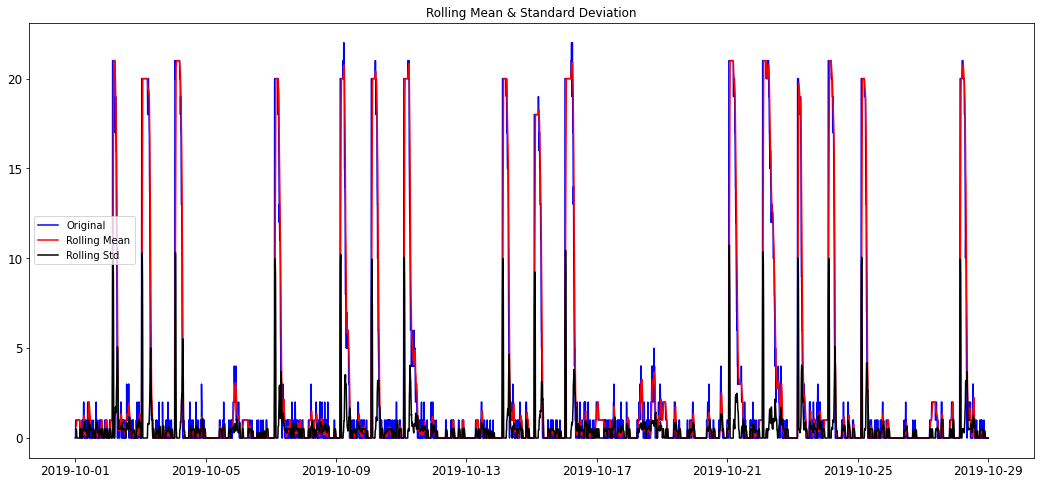

Results of Dickey-Fuller Test:
Test Statistic                -1.000078e+01
p-value                        1.886781e-17
#Lags Used                     1.900000e+01
Number of Observations Used    8.020000e+03
Critical Value (1%)           -3.431166e+00
Critical Value (5%)           -2.861900e+00
Critical Value (10%)          -2.566962e+00
dtype: float64


In [20]:
test_stationarity(var_station[var_interest])